<center> <b><font size = '5'> Support Vector Machines </b> </font> </center>

All figure credits to - https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html

In [1]:
import numpy 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<u> <font size = '5'> Binary classification </font> </u>

In a binary classification problem, we are attempting to mathematically find a way to assign a data point to a certain class. In the figure below, there are two classes (squares & circles). In order to find a method to classify each point to a class, we can define a line seperating these two classes (solid line) and assign each sample based on the side it is on.

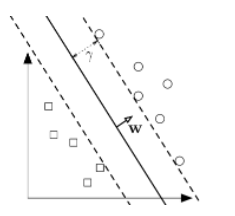

In the figure above the solid line seperating the two categories represents a margin. In mathematical terms, this is called a hyperplane. In 2D space a hyperplane is a line. In 3D space, a hyperplane is a 2D plane. (This extends to higher demensions as well). 

The solid line represents only one hyperplane out of infinite hyperplanes that could seperate the two categories in the above figure. Hence the goal of the algorithm, <b> Support Vector Machines </b>, is to find the best seperating hyperplane. This is the one that maximizes the distance to the closest data points from both classes.  



Before talking about the Support Vector Machines, we will first define what a margin is. (For simplicity, the example below is done in 2D space. Note that this also extend towards higher dimensions)

<u> <font size = '5'> Margin </font> </u>

The margin is defined as the distance from the closest point accross the two classes to the hyperplane. In order to find the margin we will then have to calculate the distances between all the data points and choose the smallest.

Let's take the following example where we try to calculate the smallest distance $d$ from some point $x$ to the hyperplane $H$. Let $x^P$ be the projection of $x$ on to $H$. We will represent the hyperplane $H$ by vector $w$.

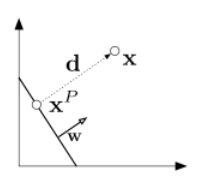

We can then calculate $x^P$.
$$x^P = x - d $$

Since $d$ is parrelel to $w$ (note that the smallest distance from $x$ to $H$ has to be a perpendicular line from $H$ to $x$),
$$d = \alpha w$$ where $\alpha$ is some real number 


In 2D space, a hyperplane is defined by a line.
$$H = w^Tx + b $$

Now since $x^P$ is on $H$, 
$$ w^T x^P + b = 0$$

We can then substitute $x^P$ and get the value for $d$. (You can find the full steps <a href = ''> here </a>)
$$ d = \frac{|w^Tx + b|}{||w||}$$

<u> <font size = '5'> Plotting the distance </font> </u>

Here, I'm using the above equations to calculate the margin given a data point and a hyperplane in 2D space.

In [2]:
from ipywidgets import interact, interactive
import numpy as np
import matplotlib.pyplot as plt

#first scatter point
def plot_distance(a,  b, x1 = 0, y1 = 3):
    
    #vector w
    w = np.array([[a], [-1]])
    
    #vector x
    x = np.array([x1, y1]).reshape(2, -1)
    
    #calculate the perpendicular distance between the point (x1, y1) and the hyperplane
    d = np.abs(np.dot(np.transpose(w), x) + b)/np.linalg.norm(w)
    
    #alpha 
    alpha = (np.dot(np.transpose(w), x) + b)/(np.transpose(w) @ w)
    #location of x_p
    origin = x - alpha * w
    
    #plot the figure
    plt.figure(figsize = (6, 6))
    x = np.linspace(-10, 10, num=1000)
    plt.scatter(x1, y1, s = 50, color = 'r')
    plt.plot(x, a * x + b)
    plt.plot([x1, origin[0,:]],[y1, origin[1,:]], color = 'red')
    plt.ylim(-8, 8)
    plt.xlim(-8, 8)
    plt.annotate(f'Distance: {np.round(d[0][0],3)}', xy = (-4, 6), fontsize = 18)
    plt.show()

interactive_plot = interactive(plot_distance, a = (-2.0, 2.0), b = (-5, 5, 0.5), x1 = (-10, 10, 0.5), y1 = (-5, 5, 0.5))

In [3]:
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In the above interactive plot you can see how the margin changes when the hyperplane and the data point changes. 

The margin is defined by the distance from the closest data point to the hyperplane. Let's plot this now. 

In [4]:
#first scatter point
def plot_margin(x1 = 0, y1 = 5, x2 = 0, y2 = -3):
    
    #define the line
    a = 1
    b = 0
    
    #vector w
    w = np.array([[a], [-1]])
    
    #vector x1,y1
    xx1 = np.array([x1, y1]).reshape(2, -1)
    
    #vector x2,y2
    xx2 = np.array([x2, y2]).reshape(2, -1)
    
    #calculate the perpendicular distance between the point (x1, y1) and the hyperplane
    d1 = np.abs(np.dot(np.transpose(w), xx1) + b)/np.linalg.norm(w)
    
    #calculate the perpendicular distance between the point (x2, y2) and the hyperplane
    d2 = np.abs(np.dot(np.transpose(w), xx2) + b)/np.linalg.norm(w)
    
    #alpha 
    alpha1 = (np.dot(np.transpose(w), xx1) + b)/(np.transpose(w) @ w)
    alpha2 = (np.dot(np.transpose(w), xx2) + b)/(np.transpose(w) @ w)
    
    #projection vectors for point 1 and point 2
    origin1 = xx1 - alpha1 * w
    origin2 = xx2 - alpha2 * w
    
    #plot the figure
    plt.figure(figsize = (6, 6))
    x = np.linspace(-10, 10, num=1000)
    plt.scatter(x1, y1, s = 50, color = 'r')
    plt.scatter(x2, y2, s = 50, color = 'k')
    plt.plot(x, a * x + b)
    if d1 <= d2:
        plt.plot([x1, origin1[0, :]], [y1, origin1[1,:]], color = 'r')     
    else:
        plt.plot([x2, origin2[0, :]], [y2, origin2[1,:]], color = 'k')
        
    plt.annotate(f'Distance: {np.round(d1[0][0], 3)}', xy = (-7, 6), fontsize = 18, color = 'r')
    plt.annotate(f'Distance: {np.round(d2[0][0], 3)}', xy = (-7, 7), fontsize = 18, color = 'k')
    plt.ylim(-8, 8)
    plt.xlim(-8, 8)
    plt.show()

interactive_plot = interactive(plot_margin, x1 = (-2.0, 2.0), y1 = (-5, 5, 0.5), x2 = (-10, 10, 0.5), y2 = (-5, 5, 0.5))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x1', max=2.0, min=-2.0), FloatSlider(value=5.0, desc…

In the plot above you can see how the margin changes when the coordinates of both data points changes. The margin is the perpendicular distance to the hyperplane from the data point that has the minimum distance.

<u> <font size = '5'> Max Margin Classifier </font> </u>

Type the equations here.

In [17]:
#plotting max margin classifier
def plot_max_margin(a, b):
    
    #sample scatter points for two classes
    x_c1 = [2, -4, 0]
    y_c1 = [5, 4, 1.5]
    x_c2 = [0, 3, -4]
    y_c2 = [-2, -2, -3]
    
    
    plt.figure(figsize = (6, 6))
    plt.scatter(x_c1, y_c1, s = 50, color = 'red')
    plt.scatter(x_c2, y_c2, s = 50, color = 'blue')
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, a * x + b)
    plt.ylim(-8, 8)
    plt.xlim(-8, 8)
    plt.show()
    
interactive_plot = interactive(plot_max_margin, a = (-2.0, 2.0, 0.5), b = (-5, 5, 0.25))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0, step=0.5), FloatSlider(value=…